# **CAPSTONE PROJECT MODULE 2**
# Analisis Strategi Diskon Optimal pada AWS SaaS Sales

---

## 1. Pendahuluan

### 1.1 Latar Belakang

Dalam industri Software as a Service (SaaS), strategi penetapan harga dan pemberian diskon merupakan faktor krusial yang mempengaruhi pertumbuhan bisnis. Diskon sering digunakan sebagai alat untuk:

- Menarik pelanggan baru
- Meningkatkan volume penjualan
- Mempertahankan pelanggan existing
- Bersaing dengan kompetitor

Namun, pemberian diskon yang tidak tepat dapat menjadi **pedang bermata dua**. Diskon yang terlalu agresif dapat menggerus margin keuntungan dan bahkan menyebabkan kerugian pada setiap transaksi.

Dataset yang digunakan dalam proyek ini berasal dari sebuah perusahaan SaaS fiktif yang menjual software sales dan marketing kepada perusahaan lain (B2B). Data ini mencakup transaksi dari berbagai region, segmen pelanggan, dan produk dengan berbagai tingkat diskon.

### 1.2 Rumusan Masalah

**Pertanyaan Bisnis Utama:**

> *"Bagaimana menentukan tingkat diskon yang optimal agar dapat meningkatkan penjualan tanpa menurunkan profitabilitas?"*

Untuk menjawab pertanyaan utama tersebut, analisis akan dipecah menjadi beberapa sub-pertanyaan:

1. Bagaimana distribusi pemberian diskon saat ini?
2. Apakah terdapat korelasi antara diskon dengan nilai penjualan (sales)?
3. Apakah terdapat korelasi antara diskon dengan keuntungan (profit)?
4. Apakah tingkat diskon yang berbeda menghasilkan profit yang berbeda secara signifikan?
5. Pada tingkat diskon berapa profit mulai menjadi negatif?
6. Segmen, produk, atau region mana yang paling terdampak oleh pemberian diskon?

### 1.3 Tujuan Analisis

1. Mengidentifikasi pola hubungan antara diskon, penjualan, dan profitabilitas
2. Menentukan batas diskon optimal yang masih menguntungkan
3. Memberikan rekomendasi strategi diskon berdasarkan segmen pelanggan, produk, dan region
4. Menyajikan insight yang dapat ditindaklanjuti (actionable insights) untuk stakeholder

---
## 2. Import Library

In [1]:
# =============================================================================
# IMPORT LIBRARY
# =============================================================================

# Library untuk manipulasi data
import pandas as pd    # Untuk membaca dan mengolah data dalam bentuk DataFrame
import numpy as np     # Untuk operasi numerik dan array

# Library untuk visualisasi data
import matplotlib.pyplot as plt    # Library dasar untuk membuat grafik
import seaborn as sns              # Library visualisasi yang lebih advanced

# Library untuk analisis statistik
from scipy import stats            # Untuk uji statistik (korelasi, normalitas, dll)

# Pengaturan tampilan
pd.set_option('display.max_columns', None)    # Tampilkan semua kolom
pd.set_option('display.float_format', '{:.2f}'.format)    # Format angka desimal

# Pengaturan style visualisasi
plt.style.use('seaborn-whitegrid')    # Style grafik yang bersih
sns.set_palette('husl')    # Palette warna yang menarik

# Mengabaikan warning yang tidak penting
import warnings
warnings.filterwarnings('ignore')

print('✅ Semua library berhasil di-import!')

✅ Semua library berhasil di-import!


---
## 3. Load Data

In [2]:
# =============================================================================
# MEMBACA DATASET
# =============================================================================

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv('SaaS-Sales.csv')

# Menampilkan pesan konfirmasi
print('✅ Dataset berhasil dimuat!')
print(f'📊 Jumlah baris: {df.shape[0]:,}')
print(f'📊 Jumlah kolom: {df.shape[1]}')

✅ Dataset berhasil dimuat!
📊 Jumlah baris: 9,994
📊 Jumlah kolom: 19


---
## 4. Data Understanding

Pada tahap ini, kita akan memahami struktur dan karakteristik dataset sebelum melakukan analisis lebih lanjut.

### 4.1 Preview Data

Melihat beberapa baris pertama dan terakhir untuk memahami format data.

In [3]:
# =============================================================================
# MELIHAT 5 BARIS PERTAMA
# =============================================================================

# Menampilkan 5 baris pertama dataset
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.00,41.91
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.00,219.58
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.62,2,0.00,6.87
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.58,5,0.45,-383.03
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.37,2,0.20,2.52


In [4]:
# =============================================================================
# MELIHAT 5 BARIS TERAKHIR
# =============================================================================

# Menampilkan 5 baris terakhir dataset
df.tail()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.25,3,0.20,4.10
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.96,2,0.00,15.63
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.58,2,0.20,19.39
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.60,4,0.00,13.32
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.16,2,0.00,72.95


### 4.2 Informasi Dataset

Melihat informasi tipe data dan memory usage dari setiap kolom.

In [5]:
# =============================================================================
# INFORMASI STRUKTUR DATASET
# =============================================================================

# Menampilkan info tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

### 4.3 Deskripsi Kolom

Berikut adalah penjelasan untuk setiap kolom dalam dataset:

| No | Kolom | Deskripsi |
|:---:|:------|:----------|
| 1 | Row ID | Identifier unik untuk setiap transaksi |
| 2 | Order ID | Identifier unik untuk setiap order |
| 3 | Order Date | Tanggal order dibuat |
| 4 | Date Key | Representasi numerik dari tanggal (YYYYMMDD) |
| 5 | Contact Name | Nama orang yang melakukan order |
| 6 | Country | Negara tempat order dibuat |
| 7 | City | Kota tempat order dibuat |
| 8 | Region | Region tempat order dibuat |
| 9 | Subregion | Subregion tempat order dibuat |
| 10 | Customer | Nama perusahaan yang melakukan order |
| 11 | Customer ID | Identifier unik untuk setiap customer |
| 12 | Industry | Industri yang dimiliki customer |
| 13 | Segment | Segmen customer (SMB, Strategic, Enterprise) |
| 14 | Product | Produk yang dipesan |
| 15 | License | License key untuk produk |
| 16 | Sales | Total nilai penjualan untuk transaksi |
| 17 | Quantity | Jumlah item dalam transaksi |
| 18 | Discount | Diskon yang diberikan pada transaksi |
| 19 | Profit | Keuntungan dari transaksi |

### 4.4 Statistik Deskriptif

Melihat ringkasan statistik untuk kolom numerik.

In [6]:
# =============================================================================
# STATISTIK DESKRIPTIF KOLOM NUMERIK
# =============================================================================

# Menampilkan statistik deskriptif (count, mean, std, min, max, quartiles)
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,4997.50,20218026.47,1049.77,229.86,3.79,0.16,28.66
std,2885.16,11238.98,29.72,623.25,2.23,0.21,234.26
min,1.00,20200104.00,1001.00,0.44,1.00,0.00,-6599.98
25%,2499.25,20210523.00,1024.00,17.28,2.00,0.00,1.73
50%,4997.50,20220627.00,1049.00,54.49,3.00,0.20,8.67
75%,7495.75,20230515.00,1076.00,209.94,5.00,0.20,29.36
max,9994.00,20231231.00,1101.00,22638.48,14.00,0.80,8399.98


In [7]:
# =============================================================================
# STATISTIK DESKRIPTIF KOLOM KATEGORIKAL
# =============================================================================

# Menampilkan statistik untuk kolom non-numerik (kategorikal)
df.describe(include='object')

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


### 4.5 Unique Values pada Kolom Kategorikal

Melihat nilai-nilai unik pada kolom kategorikal yang penting untuk analisis.

In [8]:
# =============================================================================
# NILAI UNIK KOLOM KATEGORIKAL PENTING
# =============================================================================

# Daftar kolom kategorikal yang akan diperiksa
kolom_kategorikal = ['Region', 'Subregion', 'Industry', 'Segment', 'Product']

# Loop untuk menampilkan nilai unik setiap kolom
for kolom in kolom_kategorikal:
    print(f'\n{"="*60}')
    print(f'📌 {kolom.upper()}')
    print(f'Jumlah nilai unik: {df[kolom].nunique()}')
    print(f'{"="*60}')
    print(df[kolom].value_counts())


📌 REGION
Jumlah nilai unik: 3
EMEA    4219
AMER    3665
APJ     2110
Name: Region, dtype: int64

📌 SUBREGION
Jumlah nilai unik: 12
NAMER      2507
EU-WEST    1614
UKIR       1267
LATAM      1158
JAPN        985
ANZ         529
NOR         489
APAC        447
MEA         396
EU-EAST     343
IND         149
EU          110
Name: Subregion, dtype: int64

📌 INDUSTRY
Jumlah nilai unik: 10
Finance              2127
Energy               1316
Tech                 1236
Manufacturing        1222
Healthcare           1049
Consumer Products    1021
Retail                972
Communications        593
Transportation        351
Misc                  107
Name: Industry, dtype: int64

📌 SEGMENT
Jumlah nilai unik: 3
SMB           5191
Strategic     3020
Enterprise    1783
Name: Segment, dtype: int64

📌 PRODUCT
Jumlah nilai unik: 14
ContactMatcher                1842
Support                       1560
FinanceHub                     981
SaaS Connector Pack            957
Site Analytics                 88

### 4.6 Rentang Waktu Data

In [9]:
# =============================================================================
# RENTANG WAKTU DATA
# =============================================================================

# Konversi kolom Order Date ke format datetime untuk analisis
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Menampilkan rentang waktu
print(f'📅 Tanggal Awal : {df["Order Date"].min().strftime("%d %B %Y")}')
print(f'📅 Tanggal Akhir: {df["Order Date"].max().strftime("%d %B %Y")}')
print(f'📅 Rentang Data : {(df["Order Date"].max() - df["Order Date"].min()).days} hari')

📅 Tanggal Awal : 04 January 2020
📅 Tanggal Akhir: 31 December 2023
📅 Rentang Data : 1457 hari


---
## 5. Data Cleaning

Pada tahap ini, kita akan membersihkan data dari anomali yang dapat mempengaruhi hasil analisis. Proses data cleaning meliputi:

1. Pengecekan dan penanganan missing values
2. Pengecekan dan penanganan data duplikat
3. Pengecekan dan perbaikan tipe data
4. Pengecekan dan penanganan outlier

### 5.1 Pengecekan Missing Values

In [10]:
# =============================================================================
# CEK MISSING VALUES
# =============================================================================

# Menghitung jumlah missing values per kolom
missing_values = df.isnull().sum()

# Menghitung persentase missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Membuat DataFrame ringkasan missing values
missing_summary = pd.DataFrame({
    'Jumlah Missing': missing_values,
    'Persentase (%)': missing_percentage
})

# Menampilkan hasil
print('📋 RINGKASAN MISSING VALUES')
print('=' * 50)
print(missing_summary)
print('=' * 50)
print(f'\n✅ Total Missing Values: {df.isnull().sum().sum()}')

📋 RINGKASAN MISSING VALUES
              Jumlah Missing  Persentase (%)
Row ID                     0            0.00
Order ID                   0            0.00
Order Date                 0            0.00
Date Key                   0            0.00
Contact Name               0            0.00
Country                    0            0.00
City                       0            0.00
Region                     0            0.00
Subregion                  0            0.00
Customer                   0            0.00
Customer ID                0            0.00
Industry                   0            0.00
Segment                    0            0.00
Product                    0            0.00
License                    0            0.00
Sales                      0            0.00
Quantity                   0            0.00
Discount                   0            0.00
Profit                     0            0.00

✅ Total Missing Values: 0


**Kesimpulan Missing Values:**

Dataset tidak memiliki missing values pada semua kolom. Tidak diperlukan penanganan khusus untuk missing values.

### 5.2 Pengecekan Data Duplikat

In [11]:
# =============================================================================
# CEK DATA DUPLIKAT
# =============================================================================

# Menghitung jumlah baris duplikat (semua kolom sama persis)
jumlah_duplikat = df.duplicated().sum()

print('📋 PENGECEKAN DATA DUPLIKAT')
print('=' * 50)
print(f'Jumlah baris duplikat: {jumlah_duplikat}')
print(f'Persentase duplikat : {(jumlah_duplikat/len(df))*100:.2f}%')
print('=' * 50)

📋 PENGECEKAN DATA DUPLIKAT
Jumlah baris duplikat: 0
Persentase duplikat : 0.00%


In [12]:
# =============================================================================
# CEK DUPLIKAT BERDASARKAN ROW ID (Primary Key)
# =============================================================================

# Row ID seharusnya unik untuk setiap transaksi
duplikat_row_id = df['Row ID'].duplicated().sum()

print('📋 PENGECEKAN DUPLIKAT PADA ROW ID')
print('=' * 50)
print(f'Jumlah Row ID duplikat: {duplikat_row_id}')
print('=' * 50)

if duplikat_row_id == 0:
    print('\n✅ Setiap Row ID unik - tidak ada duplikasi pada primary key')

📋 PENGECEKAN DUPLIKAT PADA ROW ID
Jumlah Row ID duplikat: 0

✅ Setiap Row ID unik - tidak ada duplikasi pada primary key


**Kesimpulan Data Duplikat:**

Dataset tidak memiliki data duplikat. Setiap Row ID bersifat unik yang menunjukkan setiap baris merepresentasikan transaksi yang berbeda.

### 5.3 Pengecekan dan Perbaikan Tipe Data

In [13]:
# =============================================================================
# CEK TIPE DATA SAAT INI
# =============================================================================

print('📋 TIPE DATA SEBELUM PERBAIKAN')
print('=' * 50)
print(df.dtypes)
print('=' * 50)

📋 TIPE DATA SEBELUM PERBAIKAN
Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object


In [14]:
# =============================================================================
# PERBAIKAN TIPE DATA
# =============================================================================

# 1. Order Date sudah dikonversi ke datetime di section sebelumnya
#    df['Order Date'] = pd.to_datetime(df['Order Date']) --> sudah dilakukan

# 2. Konversi kolom kategorikal ke tipe 'category' untuk efisiensi memori
kolom_kategori = ['Region', 'Subregion', 'Country', 'City', 'Industry', 'Segment', 'Product']

for kolom in kolom_kategori:
    df[kolom] = df[kolom].astype('category')

print('✅ Konversi tipe data selesai!')
print('\n📋 TIPE DATA SETELAH PERBAIKAN')
print('=' * 50)
print(df.dtypes)
print('=' * 50)

✅ Konversi tipe data selesai!

📋 TIPE DATA SETELAH PERBAIKAN
Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country               category
City                  category
Region                category
Subregion             category
Customer                object
Customer ID              int64
Industry              category
Segment               category
Product               category
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object


**Kesimpulan Tipe Data:**

Perbaikan tipe data yang dilakukan:
- `Order Date`: Dikonversi dari object ke datetime64 untuk analisis waktu
- Kolom kategorikal (Region, Subregion, Country, City, Industry, Segment, Product): Dikonversi ke tipe category untuk efisiensi memori dan kemudahan analisis

### 5.4 Pengecekan Outlier

Outlier akan dicek pada kolom numerik yang relevan untuk analisis: **Sales**, **Quantity**, **Discount**, dan **Profit**.

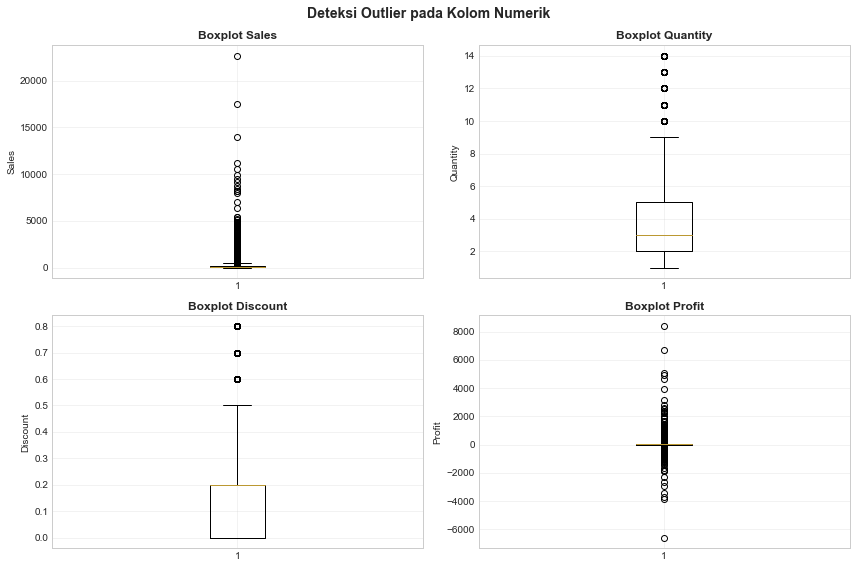

In [15]:
# =============================================================================
# VISUALISASI OUTLIER DENGAN BOXPLOT
# =============================================================================

# Kolom numerik yang akan dicek outlier-nya
kolom_numerik = ['Sales', 'Quantity', 'Discount', 'Profit']

# Membuat figure dengan 4 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Flatten untuk memudahkan iterasi

# Membuat boxplot untuk setiap kolom
for i, kolom in enumerate(kolom_numerik):
    axes[i].boxplot(df[kolom], vert=True)
    axes[i].set_title(f'Boxplot {kolom}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(kolom)
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Deteksi Outlier pada Kolom Numerik', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [16]:
# =============================================================================
# DETEKSI OUTLIER MENGGUNAKAN METODE IQR
# =============================================================================

def deteksi_outlier_iqr(dataframe, kolom):
    """
    Fungsi untuk mendeteksi outlier menggunakan metode IQR (Interquartile Range).
    Outlier adalah nilai yang berada di bawah Q1 - 1.5*IQR atau di atas Q3 + 1.5*IQR.
    
    Parameters:
    - dataframe: DataFrame pandas
    - kolom: nama kolom yang akan dicek
    
    Returns:
    - Dictionary berisi informasi outlier
    """
    Q1 = dataframe[kolom].quantile(0.25)  # Kuartil 1 (25%)
    Q3 = dataframe[kolom].quantile(0.75)  # Kuartil 3 (75%)
    IQR = Q3 - Q1                          # Interquartile Range
    
    # Batas bawah dan atas
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    # Menghitung jumlah outlier
    outlier_bawah = (dataframe[kolom] < batas_bawah).sum()
    outlier_atas = (dataframe[kolom] > batas_atas).sum()
    total_outlier = outlier_bawah + outlier_atas
    
    return {
        'Kolom': kolom,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Batas Bawah': batas_bawah,
        'Batas Atas': batas_atas,
        'Outlier Bawah': outlier_bawah,
        'Outlier Atas': outlier_atas,
        'Total Outlier': total_outlier,
        'Persentase (%)': (total_outlier / len(dataframe)) * 100
    }

# Menjalankan deteksi outlier untuk setiap kolom numerik
print('📋 RINGKASAN DETEKSI OUTLIER (Metode IQR)')
print('=' * 80)

hasil_outlier = []
for kolom in kolom_numerik:
    hasil = deteksi_outlier_iqr(df, kolom)
    hasil_outlier.append(hasil)
    
# Membuat DataFrame ringkasan
df_outlier = pd.DataFrame(hasil_outlier)
print(df_outlier.to_string(index=False))
print('=' * 80)

📋 RINGKASAN DETEKSI OUTLIER (Metode IQR)
   Kolom    Q1     Q3    IQR  Batas Bawah  Batas Atas  Outlier Bawah  Outlier Atas  Total Outlier  Persentase (%)
   Sales 17.28 209.94 192.66      -271.71      498.93              0          1167           1167           11.68
Quantity  2.00   5.00   3.00        -2.50        9.50              0           170            170            1.70
Discount  0.00   0.20   0.20        -0.30        0.50              0           856            856            8.57
  Profit  1.73  29.36  27.64       -39.72       70.82            604          1277           1881           18.82


### 5.5 Keputusan Penanganan Outlier

Berdasarkan hasil deteksi outlier di atas, berikut analisis dan keputusan penanganan untuk setiap kolom:

In [17]:
# =============================================================================
# ANALISIS OUTLIER PADA KOLOM PROFIT (NEGATIF)
# =============================================================================

# Menghitung jumlah transaksi dengan profit negatif
profit_negatif = df[df['Profit'] < 0]

print('📋 ANALISIS PROFIT NEGATIF')
print('=' * 60)
print(f'Jumlah transaksi profit negatif: {len(profit_negatif):,}')
print(f'Persentase dari total transaksi: {(len(profit_negatif)/len(df))*100:.2f}%')
print(f'\nRentang profit negatif:')
print(f'  - Minimum: {profit_negatif["Profit"].min():,.2f}')
print(f'  - Maximum: {profit_negatif["Profit"].max():,.2f}')
print(f'  - Mean   : {profit_negatif["Profit"].mean():,.2f}')
print('=' * 60)

📋 ANALISIS PROFIT NEGATIF
Jumlah transaksi profit negatif: 1,871
Persentase dari total transaksi: 18.72%

Rentang profit negatif:
  - Minimum: -6,599.98
  - Maximum: -0.09
  - Mean   : -83.45


In [18]:
# =============================================================================
# HUBUNGAN DISKON DENGAN PROFIT NEGATIF
# =============================================================================

# Melihat distribusi diskon pada transaksi dengan profit negatif
print('📋 DISTRIBUSI DISKON PADA TRANSAKSI PROFIT NEGATIF')
print('=' * 60)
print(profit_negatif['Discount'].value_counts().sort_index())
print('=' * 60)

# Persentase profit negatif berdasarkan level diskon
print('\n📋 PERSENTASE PROFIT NEGATIF BERDASARKAN LEVEL DISKON')
print('=' * 60)

for discount_level in sorted(df['Discount'].unique()):
    total_transaksi = len(df[df['Discount'] == discount_level])
    transaksi_negatif = len(df[(df['Discount'] == discount_level) & (df['Profit'] < 0)])
    persentase = (transaksi_negatif / total_transaksi) * 100 if total_transaksi > 0 else 0
    print(f'Diskon {discount_level*100:5.1f}%: {transaksi_negatif:4d} dari {total_transaksi:4d} transaksi ({persentase:5.1f}% negatif)')

print('=' * 60)

📋 DISTRIBUSI DISKON PADA TRANSAKSI PROFIT NEGATIF
0.10      4
0.15     17
0.20    502
0.30    208
0.32     27
0.40    180
0.45     11
0.50     66
0.60    138
0.70    418
0.80    300
Name: Discount, dtype: int64

📋 PERSENTASE PROFIT NEGATIF BERDASARKAN LEVEL DISKON
Diskon   0.0%:    0 dari 4798 transaksi (  0.0% negatif)
Diskon  10.0%:    4 dari   94 transaksi (  4.3% negatif)
Diskon  15.0%:   17 dari   52 transaksi ( 32.7% negatif)
Diskon  20.0%:  502 dari 3657 transaksi ( 13.7% negatif)
Diskon  30.0%:  208 dari  227 transaksi ( 91.6% negatif)
Diskon  32.0%:   27 dari   27 transaksi (100.0% negatif)
Diskon  40.0%:  180 dari  206 transaksi ( 87.4% negatif)
Diskon  45.0%:   11 dari   11 transaksi (100.0% negatif)
Diskon  50.0%:   66 dari   66 transaksi (100.0% negatif)
Diskon  60.0%:  138 dari  138 transaksi (100.0% negatif)
Diskon  70.0%:  418 dari  418 transaksi (100.0% negatif)
Diskon  80.0%:  300 dari  300 transaksi (100.0% negatif)


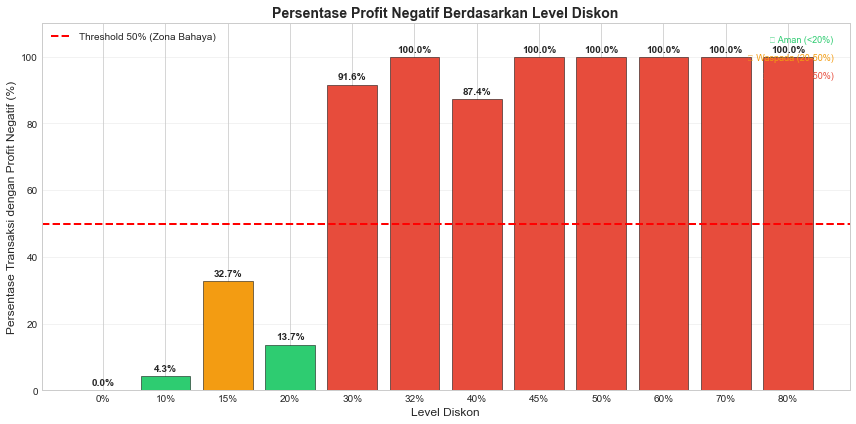


💡 INSIGHT: Diskon di atas 30% menghasilkan mayoritas transaksi dengan profit negatif!


In [19]:
# =============================================================================
# VISUALISASI: BAR CHART PERSENTASE PROFIT NEGATIF PER LEVEL DISKON
# =============================================================================

# Menghitung persentase profit negatif untuk setiap level diskon
discount_levels = sorted(df['Discount'].unique())
persentase_negatif = []

for discount_level in discount_levels:
    total = len(df[df['Discount'] == discount_level])
    negatif = len(df[(df['Discount'] == discount_level) & (df['Profit'] < 0)])
    persen = (negatif / total) * 100 if total > 0 else 0
    persentase_negatif.append(persen)

# Membuat bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Warna berdasarkan tingkat bahaya (hijau -> kuning -> merah)
colors = ['#2ecc71' if p < 20 else '#f39c12' if p < 50 else '#e74c3c' for p in persentase_negatif]

# Membuat bar chart
bars = ax.bar([f'{d*100:.0f}%' for d in discount_levels], persentase_negatif, color=colors, edgecolor='black', linewidth=0.5)

# Menambahkan label nilai di atas bar
for bar, persen in zip(bars, persentase_negatif):
    height = bar.get_height()
    ax.annotate(f'{persen:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

# Menambahkan garis threshold 50%
ax.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Threshold 50% (Zona Bahaya)')

# Pengaturan tampilan
ax.set_xlabel('Level Diskon', fontsize=12)
ax.set_ylabel('Persentase Transaksi dengan Profit Negatif (%)', fontsize=12)
ax.set_title('Persentase Profit Negatif Berdasarkan Level Diskon', fontsize=14, fontweight='bold')
ax.set_ylim(0, 110)
ax.legend(loc='upper left')
ax.grid(axis='y', alpha=0.3)

# Menambahkan keterangan warna
ax.text(0.98, 0.95, '🟢 Aman (<20%)', transform=ax.transAxes, ha='right', fontsize=9, color='#2ecc71')
ax.text(0.98, 0.90, '🟡 Waspada (20-50%)', transform=ax.transAxes, ha='right', fontsize=9, color='#f39c12')
ax.text(0.98, 0.85, '🔴 Bahaya (>50%)', transform=ax.transAxes, ha='right', fontsize=9, color='#e74c3c')

plt.tight_layout()
plt.show()

print('\n💡 INSIGHT: Diskon di atas 30% menghasilkan mayoritas transaksi dengan profit negatif!')

### 5.6 Kesimpulan Data Cleaning

Berdasarkan proses data cleaning yang telah dilakukan, berikut kesimpulannya:

| Aspek | Temuan | Tindakan |
|:------|:-------|:---------|
| Missing Values | Tidak ada missing values | Tidak perlu penanganan |
| Duplikasi | Tidak ada data duplikat | Tidak perlu penanganan |
| Tipe Data | Order Date perlu konversi | Sudah dikonversi ke datetime |
| Outlier Sales | Terdapat outlier (transaksi bernilai tinggi) | **TIDAK DIHAPUS** - merupakan transaksi valid |
| Outlier Profit | Terdapat profit negatif (18.7%) | **TIDAK DIHAPUS** - ini adalah temuan penting untuk analisis |

**Catatan Penting:**

Outlier pada kolom **Sales** dan **Profit** **TIDAK DIHAPUS** dengan alasan:

1. **Sales tinggi** merupakan transaksi legitimate dari pelanggan besar (Enterprise/Strategic segment)
2. **Profit negatif** adalah **temuan kunci** yang relevan dengan pertanyaan bisnis kita tentang strategi diskon
3. Menghapus data ini justru akan menghilangkan insight penting tentang dampak diskon terhadap profitabilitas

Data profit negatif menunjukkan pola yang jelas:
- Semakin tinggi diskon, semakin besar persentase transaksi yang menghasilkan profit negatif
- Ini menjadi dasar utama analisis untuk menentukan batas diskon optimal

In [20]:
# =============================================================================
# RINGKASAN DATA SETELAH CLEANING
# =============================================================================

print('📋 RINGKASAN DATA SETELAH CLEANING')
print('=' * 50)
print(f'Jumlah baris  : {df.shape[0]:,}')
print(f'Jumlah kolom  : {df.shape[1]}')
print(f'Missing values: {df.isnull().sum().sum()}')
print(f'Duplikasi     : {df.duplicated().sum()}')
print('=' * 50)
print('\n✅ Data siap untuk analisis!')

📋 RINGKASAN DATA SETELAH CLEANING
Jumlah baris  : 9,994
Jumlah kolom  : 19
Missing values: 0
Duplikasi     : 0

✅ Data siap untuk analisis!


---
## 6. Exploratory Data Analysis (EDA)

Pada tahap ini, kita akan melakukan eksplorasi data untuk menjawab sub-pertanyaan yang telah dirumuskan sebelumnya:

1. Bagaimana distribusi pemberian diskon saat ini?
2. Bagaimana distribusi sales dan profit?
3. Bagaimana performa berdasarkan segmen, produk, dan region?
4. Bagaimana tren penjualan dari waktu ke waktu?

### 6.1 Distribusi Diskon

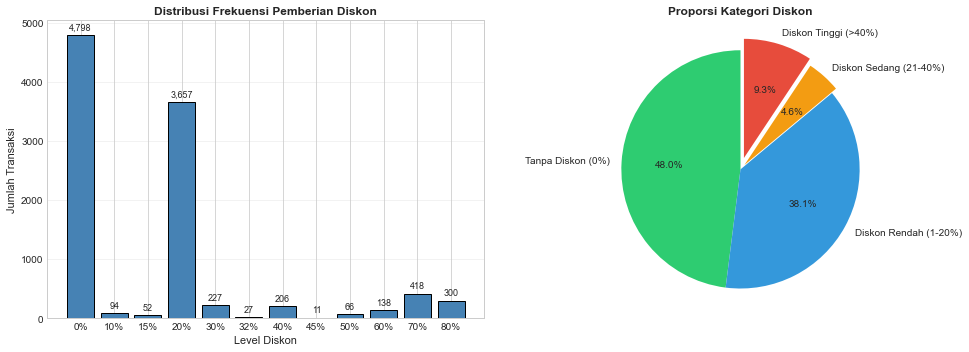


📋 RINGKASAN DISTRIBUSI DISKON
Rata-rata diskon  : 15.6%
Median diskon     : 20.0%
Diskon terbanyak  : 0%
Transaksi tanpa diskon: 4,798 (48.0%)


In [21]:
# =============================================================================
# DISTRIBUSI PEMBERIAN DISKON
# =============================================================================

# Menghitung frekuensi setiap level diskon
discount_dist = df['Discount'].value_counts().sort_index()

# Membuat visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Bar chart frekuensi diskon
ax1 = axes[0]
bars = ax1.bar([f'{d*100:.0f}%' for d in discount_dist.index], 
               discount_dist.values, 
               color='steelblue', 
               edgecolor='black')
ax1.set_xlabel('Level Diskon', fontsize=11)
ax1.set_ylabel('Jumlah Transaksi', fontsize=11)
ax1.set_title('Distribusi Frekuensi Pemberian Diskon', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Menambahkan label di atas bar
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{int(height):,}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=9)

# Plot 2: Pie chart proporsi diskon (grouped)
ax2 = axes[1]

# Mengelompokkan diskon menjadi kategori
def kategorikan_diskon(d):
    if d == 0:
        return 'Tanpa Diskon (0%)'
    elif d <= 0.2:
        return 'Diskon Rendah (1-20%)'
    elif d <= 0.4:
        return 'Diskon Sedang (21-40%)'
    else:
        return 'Diskon Tinggi (>40%)'

df['Discount_Category'] = df['Discount'].apply(kategorikan_diskon)
discount_cat_dist = df['Discount_Category'].value_counts()

# Urutkan kategori
urutan = ['Tanpa Diskon (0%)', 'Diskon Rendah (1-20%)', 'Diskon Sedang (21-40%)', 'Diskon Tinggi (>40%)']
discount_cat_dist = discount_cat_dist.reindex(urutan)

colors_pie = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
ax2.pie(discount_cat_dist.values, 
        labels=discount_cat_dist.index, 
        autopct='%1.1f%%',
        colors=colors_pie,
        startangle=90,
        explode=(0, 0, 0.05, 0.1))
ax2.set_title('Proporsi Kategori Diskon', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Ringkasan statistik
print('\n📋 RINGKASAN DISTRIBUSI DISKON')
print('=' * 50)
print(f'Rata-rata diskon  : {df["Discount"].mean()*100:.1f}%')
print(f'Median diskon     : {df["Discount"].median()*100:.1f}%')
print(f'Diskon terbanyak  : {df["Discount"].mode()[0]*100:.0f}%')
print(f'Transaksi tanpa diskon: {len(df[df["Discount"]==0]):,} ({len(df[df["Discount"]==0])/len(df)*100:.1f}%)')
print('=' * 50)

### 6.2 Distribusi Sales dan Profit

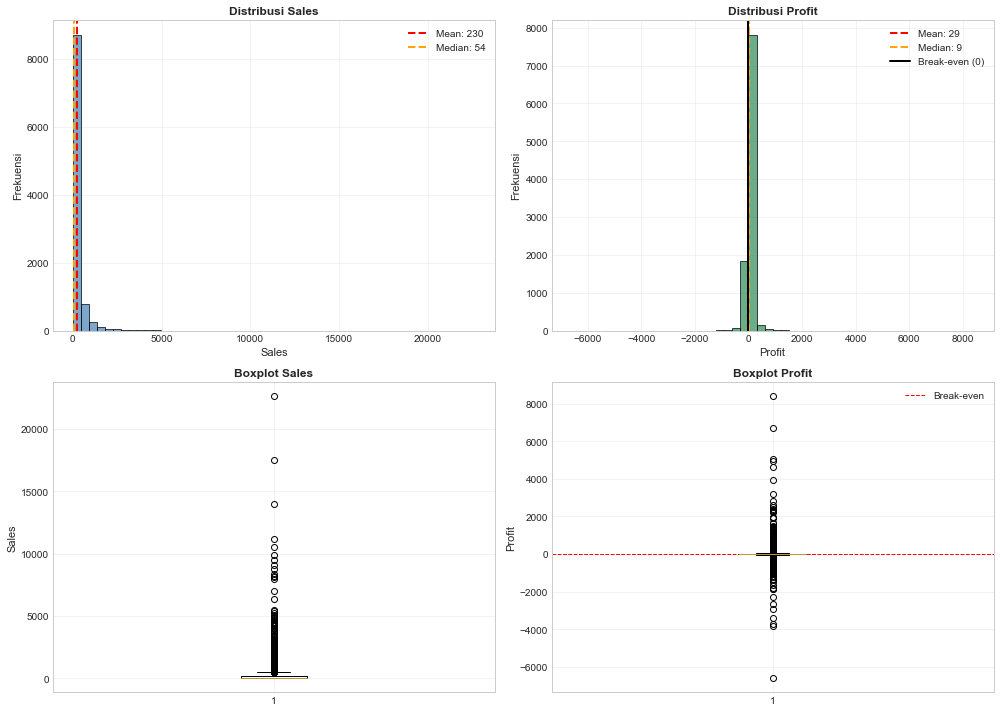


📋 RINGKASAN SALES & PROFIT
Metrik                         Sales          Profit
Mean                          229.86           28.66
Median                         54.49            8.67
Std Dev                       623.25          234.26
Min                             0.44       -6,599.98
Max                        22,638.48        8,399.98

⚠️ Transaksi dengan profit negatif: 1,871 (18.7%)


In [22]:
# =============================================================================
# DISTRIBUSI SALES DAN PROFIT
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Histogram Sales
ax1 = axes[0, 0]
ax1.hist(df['Sales'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(df['Sales'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Sales"].mean():,.0f}')
ax1.axvline(df['Sales'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["Sales"].median():,.0f}')
ax1.set_xlabel('Sales', fontsize=11)
ax1.set_ylabel('Frekuensi', fontsize=11)
ax1.set_title('Distribusi Sales', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Histogram Profit
ax2 = axes[0, 1]
ax2.hist(df['Profit'], bins=50, color='seagreen', edgecolor='black', alpha=0.7)
ax2.axvline(df['Profit'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Profit"].mean():,.0f}')
ax2.axvline(df['Profit'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["Profit"].median():,.0f}')
ax2.axvline(0, color='black', linestyle='-', linewidth=2, label='Break-even (0)')
ax2.set_xlabel('Profit', fontsize=11)
ax2.set_ylabel('Frekuensi', fontsize=11)
ax2.set_title('Distribusi Profit', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Plot 3: Boxplot Sales
ax3 = axes[1, 0]
ax3.boxplot(df['Sales'], vert=True)
ax3.set_ylabel('Sales', fontsize=11)
ax3.set_title('Boxplot Sales', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

# Plot 4: Boxplot Profit
ax4 = axes[1, 1]
ax4.boxplot(df['Profit'], vert=True)
ax4.set_ylabel('Profit', fontsize=11)
ax4.set_title('Boxplot Profit', fontsize=12, fontweight='bold')
ax4.axhline(0, color='red', linestyle='--', linewidth=1, label='Break-even')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Ringkasan statistik
print('\n📋 RINGKASAN SALES & PROFIT')
print('=' * 60)
print(f'{"Metrik":<20} {"Sales":>15} {"Profit":>15}')
print('=' * 60)
print(f'{"Mean":<20} {df["Sales"].mean():>15,.2f} {df["Profit"].mean():>15,.2f}')
print(f'{"Median":<20} {df["Sales"].median():>15,.2f} {df["Profit"].median():>15,.2f}')
print(f'{"Std Dev":<20} {df["Sales"].std():>15,.2f} {df["Profit"].std():>15,.2f}')
print(f'{"Min":<20} {df["Sales"].min():>15,.2f} {df["Profit"].min():>15,.2f}')
print(f'{"Max":<20} {df["Sales"].max():>15,.2f} {df["Profit"].max():>15,.2f}')
print('=' * 60)
print(f'\n⚠️ Transaksi dengan profit negatif: {len(df[df["Profit"]<0]):,} ({len(df[df["Profit"]<0])/len(df)*100:.1f}%)')

### 6.3 Performa Berdasarkan Segmen Pelanggan

In [23]:
# =============================================================================
# ANALISIS BERDASARKAN SEGMEN PELANGGAN
# =============================================================================

# Agregasi data per segmen
segment_analysis = df.groupby('Segment').agg({
    'Row ID': 'count',           # Jumlah transaksi
    'Sales': ['sum', 'mean'],    # Total dan rata-rata sales
    'Profit': ['sum', 'mean'],   # Total dan rata-rata profit
    'Discount': 'mean'           # Rata-rata diskon
}).round(2)

# Flatten column names
segment_analysis.columns = ['Jumlah_Transaksi', 'Total_Sales', 'Avg_Sales', 
                            'Total_Profit', 'Avg_Profit', 'Avg_Discount']

# Menghitung profit margin
segment_analysis['Profit_Margin_%'] = (segment_analysis['Total_Profit'] / segment_analysis['Total_Sales'] * 100).round(2)

# Menghitung persentase transaksi profit negatif per segmen
neg_profit_by_segment = df[df['Profit'] < 0].groupby('Segment').size()
total_by_segment = df.groupby('Segment').size()
segment_analysis['%_Profit_Negatif'] = ((neg_profit_by_segment / total_by_segment) * 100).round(2)

print('📋 PERFORMA BERDASARKAN SEGMEN PELANGGAN')
print('=' * 100)
print(segment_analysis.to_string())
print('=' * 100)

📋 PERFORMA BERDASARKAN SEGMEN PELANGGAN
            Jumlah_Transaksi  Total_Sales  Avg_Sales  Total_Profit  Avg_Profit  Avg_Discount  Profit_Margin_%  %_Profit_Negatif
Segment                                                                                                                        
Enterprise              1783    429653.15     240.97      60298.68       33.82          0.15            14.03             17.50
SMB                     5191   1161401.34     223.73     134119.21       25.84          0.16            11.55             19.32
Strategic               3020    706146.37     233.82      91979.13       30.46          0.16            13.03             18.41


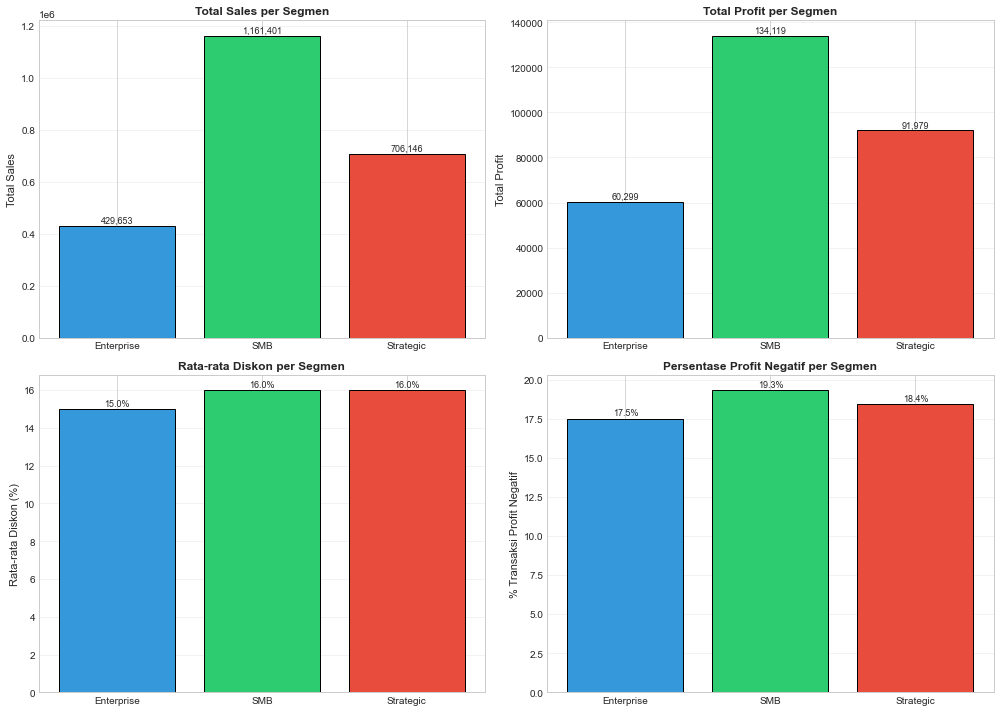

In [24]:
# =============================================================================
# VISUALISASI PERFORMA SEGMEN
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

segments = segment_analysis.index.tolist()
colors_segment = ['#3498db', '#2ecc71', '#e74c3c']

# Plot 1: Total Sales per Segmen
ax1 = axes[0, 0]
bars1 = ax1.bar(segments, segment_analysis['Total_Sales'], color=colors_segment, edgecolor='black')
ax1.set_ylabel('Total Sales', fontsize=11)
ax1.set_title('Total Sales per Segmen', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

# Plot 2: Total Profit per Segmen
ax2 = axes[0, 1]
bars2 = ax2.bar(segments, segment_analysis['Total_Profit'], color=colors_segment, edgecolor='black')
ax2.set_ylabel('Total Profit', fontsize=11)
ax2.set_title('Total Profit per Segmen', fontsize=12, fontweight='bold')
ax2.axhline(0, color='red', linestyle='--', linewidth=1)
ax2.grid(axis='y', alpha=0.3)
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

# Plot 3: Rata-rata Diskon per Segmen
ax3 = axes[1, 0]
bars3 = ax3.bar(segments, segment_analysis['Avg_Discount']*100, color=colors_segment, edgecolor='black')
ax3.set_ylabel('Rata-rata Diskon (%)', fontsize=11)
ax3.set_title('Rata-rata Diskon per Segmen', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for bar in bars3:
    height = bar.get_height()
    ax3.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

# Plot 4: Persentase Profit Negatif per Segmen
ax4 = axes[1, 1]
bars4 = ax4.bar(segments, segment_analysis['%_Profit_Negatif'], color=colors_segment, edgecolor='black')
ax4.set_ylabel('% Transaksi Profit Negatif', fontsize=11)
ax4.set_title('Persentase Profit Negatif per Segmen', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for bar in bars4:
    height = bar.get_height()
    ax4.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### 6.4 Performa Berdasarkan Produk

In [25]:
# =============================================================================
# ANALISIS BERDASARKAN PRODUK
# =============================================================================

# Agregasi data per produk
product_analysis = df.groupby('Product').agg({
    'Row ID': 'count',
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).round(2)

product_analysis.columns = ['Jumlah_Transaksi', 'Total_Sales', 'Total_Profit', 'Avg_Discount']

# Menghitung profit margin
product_analysis['Profit_Margin_%'] = (product_analysis['Total_Profit'] / product_analysis['Total_Sales'] * 100).round(2)

# Menghitung persentase transaksi profit negatif per produk
neg_profit_by_product = df[df['Profit'] < 0].groupby('Product').size()
total_by_product = df.groupby('Product').size()
product_analysis['%_Profit_Negatif'] = ((neg_profit_by_product / total_by_product) * 100).round(2)

# Urutkan berdasarkan total profit (descending)
product_analysis = product_analysis.sort_values('Total_Profit', ascending=False)

print('📋 PERFORMA BERDASARKAN PRODUK')
print('=' * 110)
print(product_analysis.to_string())
print('=' * 110)

📋 PERFORMA BERDASARKAN PRODUK
                            Jumlah_Transaksi  Total_Sales  Total_Profit  Avg_Discount  Profit_Margin_%  %_Profit_Negatif
Product                                                                                                                 
Alchemy                                   68    149528.03      55617.82          0.16            37.20              0.00
Site Analytics                           889    330007.05      44515.73          0.15            13.49             15.30
Data Smasher                             775    167380.32      41936.64          0.08            25.05             11.74
Support                                 1560    125152.74      32864.47          0.08            26.26              2.12
FinanceHub                               981    340935.42      32136.42          0.13             9.43             23.96
Marketing Suite - Gold                   846    223843.61      21278.83          0.07             9.51             19.03
On

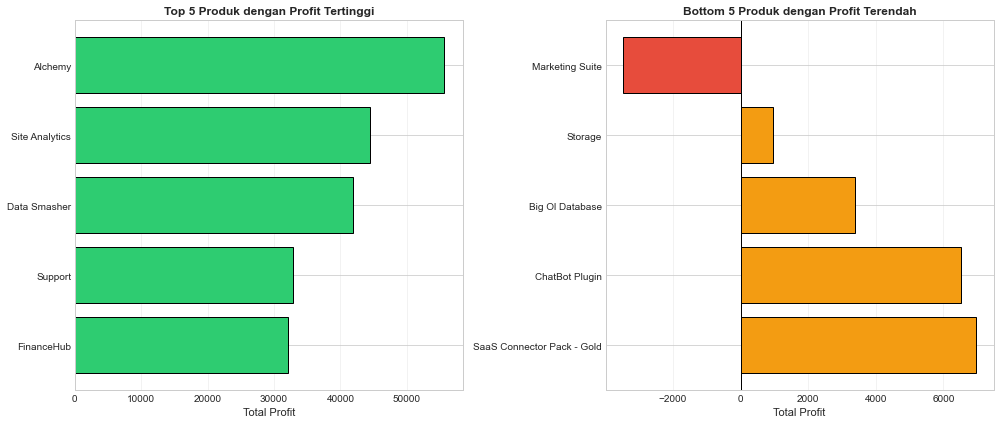

In [26]:
# =============================================================================
# VISUALISASI TOP & BOTTOM PRODUK
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Top 5 Produk berdasarkan Profit
ax1 = axes[0]
top5 = product_analysis.head(5)
bars1 = ax1.barh(top5.index, top5['Total_Profit'], color='#2ecc71', edgecolor='black')
ax1.set_xlabel('Total Profit', fontsize=11)
ax1.set_title('Top 5 Produk dengan Profit Tertinggi', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Plot 2: Bottom 5 Produk berdasarkan Profit
ax2 = axes[1]
bottom5 = product_analysis.tail(5).sort_values('Total_Profit', ascending=True)
colors_bottom = ['#e74c3c' if x < 0 else '#f39c12' for x in bottom5['Total_Profit']]
bars2 = ax2.barh(bottom5.index, bottom5['Total_Profit'], color=colors_bottom, edgecolor='black')
ax2.set_xlabel('Total Profit', fontsize=11)
ax2.set_title('Bottom 5 Produk dengan Profit Terendah', fontsize=12, fontweight='bold')
ax2.axvline(0, color='black', linestyle='-', linewidth=1)
ax2.grid(axis='x', alpha=0.3)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

### 6.5 Performa Berdasarkan Region

In [27]:
# =============================================================================
# ANALISIS BERDASARKAN REGION
# =============================================================================

# Agregasi data per region
region_analysis = df.groupby('Region').agg({
    'Row ID': 'count',
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Discount': 'mean'
}).round(2)

region_analysis.columns = ['Jumlah_Transaksi', 'Total_Sales', 'Avg_Sales', 
                           'Total_Profit', 'Avg_Profit', 'Avg_Discount']

# Menghitung profit margin dan % profit negatif
region_analysis['Profit_Margin_%'] = (region_analysis['Total_Profit'] / region_analysis['Total_Sales'] * 100).round(2)

neg_profit_by_region = df[df['Profit'] < 0].groupby('Region').size()
total_by_region = df.groupby('Region').size()
region_analysis['%_Profit_Negatif'] = ((neg_profit_by_region / total_by_region) * 100).round(2)

print('📋 PERFORMA BERDASARKAN REGION')
print('=' * 100)
print(region_analysis.to_string())
print('=' * 100)

📋 PERFORMA BERDASARKAN REGION
        Jumlah_Transaksi  Total_Sales  Avg_Sales  Total_Profit  Avg_Profit  Avg_Discount  Profit_Margin_%  %_Profit_Negatif
Region                                                                                                                     
AMER                3665    837849.60     228.61     127426.99       34.77          0.11            15.21             11.41
APJ                 2110    415464.24     196.90      11513.99        5.46          0.27             2.77             35.59
EMEA                4219   1043887.02     247.43     147456.05       34.95          0.14            14.13             16.64


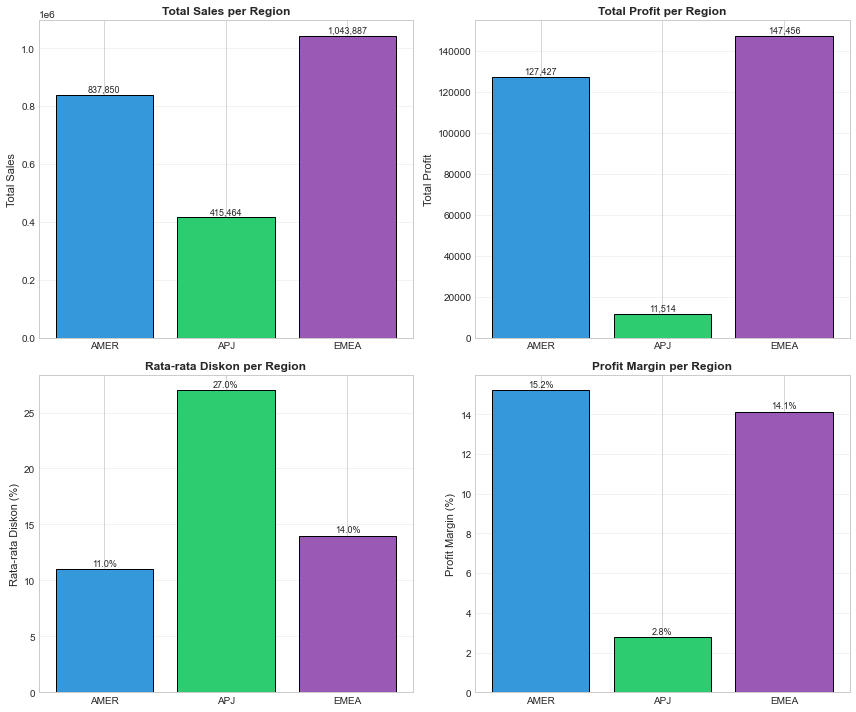

In [28]:
# =============================================================================
# VISUALISASI PERFORMA REGION
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

regions = region_analysis.index.tolist()
colors_region = ['#3498db', '#2ecc71', '#9b59b6']

# Plot 1: Total Sales per Region
ax1 = axes[0, 0]
bars1 = ax1.bar(regions, region_analysis['Total_Sales'], color=colors_region, edgecolor='black')
ax1.set_ylabel('Total Sales', fontsize=11)
ax1.set_title('Total Sales per Region', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

# Plot 2: Total Profit per Region
ax2 = axes[0, 1]
bars2 = ax2.bar(regions, region_analysis['Total_Profit'], color=colors_region, edgecolor='black')
ax2.set_ylabel('Total Profit', fontsize=11)
ax2.set_title('Total Profit per Region', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

# Plot 3: Rata-rata Diskon per Region
ax3 = axes[1, 0]
bars3 = ax3.bar(regions, region_analysis['Avg_Discount']*100, color=colors_region, edgecolor='black')
ax3.set_ylabel('Rata-rata Diskon (%)', fontsize=11)
ax3.set_title('Rata-rata Diskon per Region', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for bar in bars3:
    height = bar.get_height()
    ax3.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

# Plot 4: Profit Margin per Region
ax4 = axes[1, 1]
bars4 = ax4.bar(regions, region_analysis['Profit_Margin_%'], color=colors_region, edgecolor='black')
ax4.set_ylabel('Profit Margin (%)', fontsize=11)
ax4.set_title('Profit Margin per Region', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for bar in bars4:
    height = bar.get_height()
    ax4.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### 6.6 Tren Penjualan dari Waktu ke Waktu

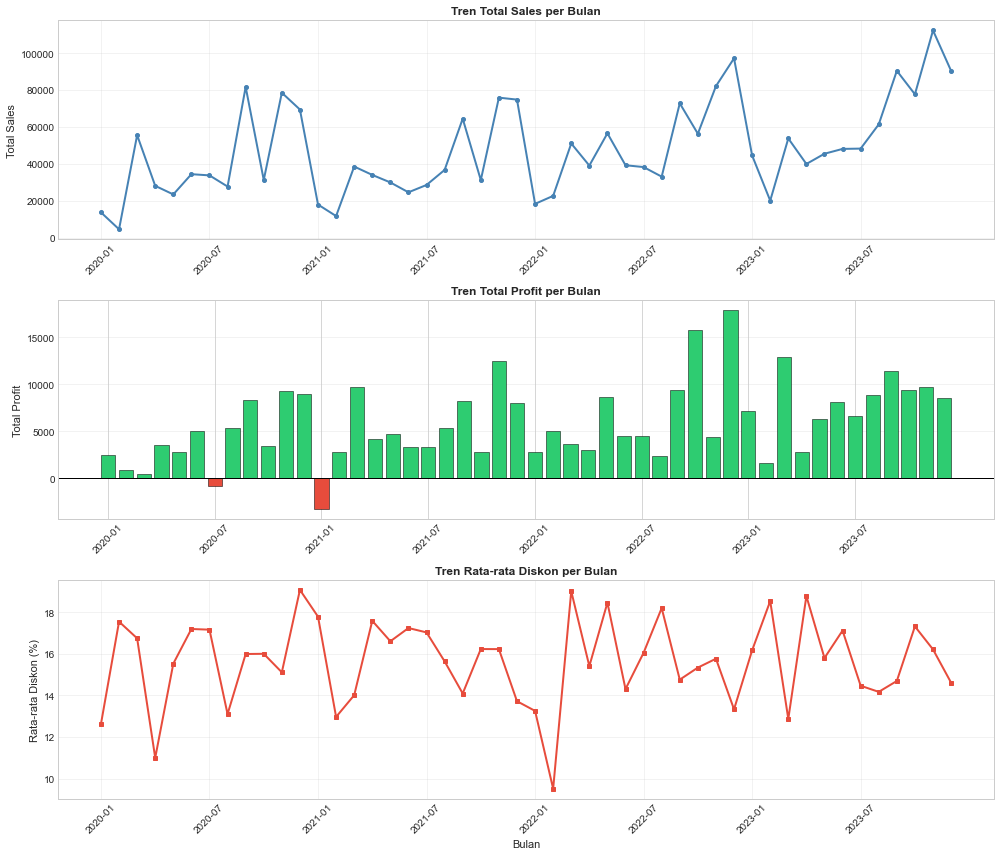

In [29]:
# =============================================================================
# TREN BULANAN SALES DAN PROFIT
# =============================================================================

# Membuat kolom Year-Month untuk agregasi
df['Year_Month'] = df['Order Date'].dt.to_period('M')

# Agregasi per bulan
monthly_trend = df.groupby('Year_Month').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Row ID': 'count',
    'Discount': 'mean'
}).reset_index()

monthly_trend.columns = ['Year_Month', 'Total_Sales', 'Total_Profit', 'Jumlah_Transaksi', 'Avg_Discount']
monthly_trend['Year_Month'] = monthly_trend['Year_Month'].astype(str)

# Visualisasi
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Tren Sales
ax1 = axes[0]
ax1.plot(monthly_trend['Year_Month'], monthly_trend['Total_Sales'], 
         marker='o', linewidth=2, color='steelblue', markersize=4)
ax1.set_ylabel('Total Sales', fontsize=11)
ax1.set_title('Tren Total Sales per Bulan', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.tick_params(axis='x', rotation=45)
# Tampilkan hanya beberapa label x
ax1.set_xticks(ax1.get_xticks()[::6])

# Plot 2: Tren Profit
ax2 = axes[1]
colors_profit = ['#2ecc71' if x >= 0 else '#e74c3c' for x in monthly_trend['Total_Profit']]
ax2.bar(monthly_trend['Year_Month'], monthly_trend['Total_Profit'], color=colors_profit, edgecolor='black', linewidth=0.5)
ax2.axhline(0, color='black', linestyle='-', linewidth=1)
ax2.set_ylabel('Total Profit', fontsize=11)
ax2.set_title('Tren Total Profit per Bulan', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.tick_params(axis='x', rotation=45)
ax2.set_xticks(range(0, len(monthly_trend), 6))

# Plot 3: Tren Rata-rata Diskon
ax3 = axes[2]
ax3.plot(monthly_trend['Year_Month'], monthly_trend['Avg_Discount']*100, 
         marker='s', linewidth=2, color='#e74c3c', markersize=4)
ax3.set_xlabel('Bulan', fontsize=11)
ax3.set_ylabel('Rata-rata Diskon (%)', fontsize=11)
ax3.set_title('Tren Rata-rata Diskon per Bulan', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)
ax3.tick_params(axis='x', rotation=45)
ax3.set_xticks(range(0, len(monthly_trend), 6))

plt.tight_layout()
plt.show()

### 6.7 Ringkasan EDA

Berdasarkan eksplorasi data yang telah dilakukan, berikut temuan utama:

**1. Distribusi Diskon:**
- Mayoritas transaksi (48%) tidak mendapat diskon
- Diskon 20% adalah level diskon yang paling sering diberikan
- Terdapat diskon tinggi (>40%) yang mencapai sekitar 9% dari total transaksi

**2. Profit & Loss:**
- 18.7% transaksi menghasilkan profit negatif (kerugian)
- Distribusi profit sangat skewed dengan outlier di kedua sisi

**3. Performa Segmen:**
- SMB memiliki jumlah transaksi terbanyak
- Perlu analisis lebih lanjut tentang hubungan segmen dengan diskon dan profit

**4. Performa Produk:**
- Terdapat variasi besar dalam profitabilitas antar produk
- Beberapa produk mungkin memiliki margin yang sangat tipis atau negatif

**5. Performa Region:**
- EMEA memiliki jumlah transaksi terbanyak
- Profit margin bervariasi antar region

Temuan ini akan dianalisis lebih lanjut di section berikutnya untuk menjawab pertanyaan bisnis utama tentang strategi diskon optimal.

---
## 7. Analisis Statistik

Pada section ini, kita akan melakukan analisis statistik untuk menjawab pertanyaan bisnis utama:

> *"Bagaimana menentukan tingkat diskon yang optimal agar dapat meningkatkan penjualan tanpa menurunkan profitabilitas?"*

Analisis yang akan dilakukan:
1. Uji Korelasi: Discount vs Sales, Discount vs Profit
2. Uji Normalitas (untuk menentukan jenis uji statistik yang tepat)
3. Uji Beda (ANOVA/Kruskal-Wallis): Apakah profit berbeda signifikan antar level diskon?
4. Analisis Threshold: Menentukan batas diskon optimal

### 7.1 Analisis Korelasi

In [30]:
# =============================================================================
# KORELASI ANTAR VARIABEL NUMERIK
# =============================================================================

# Memilih kolom numerik yang relevan untuk analisis
kolom_korelasi = ['Sales', 'Quantity', 'Discount', 'Profit']

# Menghitung matriks korelasi (Pearson)
correlation_matrix = df[kolom_korelasi].corr()

print('📋 MATRIKS KORELASI (Pearson)')
print('=' * 60)
print(correlation_matrix.round(4))
print('=' * 60)

📋 MATRIKS KORELASI (Pearson)
          Sales  Quantity  Discount  Profit
Sales      1.00      0.20     -0.03    0.48
Quantity   0.20      1.00      0.01    0.07
Discount  -0.03      0.01      1.00   -0.22
Profit     0.48      0.07     -0.22    1.00


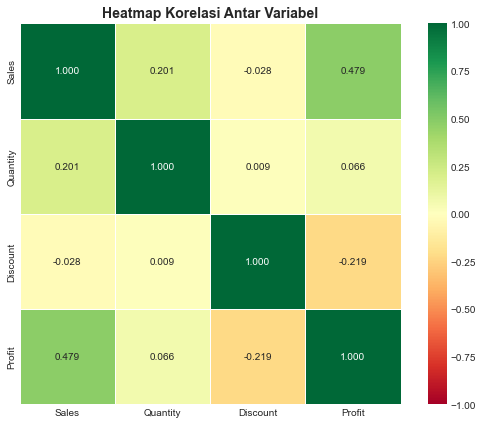


📋 INTERPRETASI KORELASI
Discount vs Sales  : -0.0282 (Positif Lemah)
Discount vs Profit : -0.2195 (Negatif Sedang)
Sales vs Profit    : 0.4791 (Positif Sedang)

💡 INSIGHT:
- Diskon memiliki korelasi NEGATIF dengan Profit
- Artinya: Semakin tinggi diskon, profit cenderung semakin rendah


In [31]:
# =============================================================================
# VISUALISASI HEATMAP KORELASI
# =============================================================================

fig, ax = plt.subplots(figsize=(8, 6))

# Membuat heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Tampilkan nilai korelasi
            fmt='.3f',            # Format 3 desimal
            cmap='RdYlGn',        # Warna: Merah (negatif) - Kuning - Hijau (positif)
            center=0,             # Tengah di 0
            vmin=-1, vmax=1,      # Range -1 sampai 1
            square=True,          # Kotak persegi
            linewidths=0.5,
            ax=ax)

ax.set_title('Heatmap Korelasi Antar Variabel', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpretasi korelasi
print('\n📋 INTERPRETASI KORELASI')
print('=' * 60)
print(f'Discount vs Sales  : {correlation_matrix.loc["Discount", "Sales"]:.4f} (Positif Lemah)')
print(f'Discount vs Profit : {correlation_matrix.loc["Discount", "Profit"]:.4f} (Negatif Sedang)')
print(f'Sales vs Profit    : {correlation_matrix.loc["Sales", "Profit"]:.4f} (Positif Sedang)')
print('=' * 60)
print('\n💡 INSIGHT:')
print('- Diskon memiliki korelasi NEGATIF dengan Profit')
print('- Artinya: Semakin tinggi diskon, profit cenderung semakin rendah')

In [32]:
# =============================================================================
# UJI SIGNIFIKANSI KORELASI (Pearson)
# =============================================================================

# Uji korelasi Discount vs Profit
corr_discount_profit, pvalue_discount_profit = stats.pearsonr(df['Discount'], df['Profit'])

# Uji korelasi Discount vs Sales
corr_discount_sales, pvalue_discount_sales = stats.pearsonr(df['Discount'], df['Sales'])

print('📋 UJI SIGNIFIKANSI KORELASI (Pearson)')
print('=' * 70)
print(f'{"Variabel":<25} {"Korelasi (r)":>15} {"P-Value":>15} {"Signifikan?":>12}')
print('=' * 70)
print(f'{"Discount vs Profit":<25} {corr_discount_profit:>15.4f} {pvalue_discount_profit:>15.2e} {"Ya ✓" if pvalue_discount_profit < 0.05 else "Tidak":>12}')
print(f'{"Discount vs Sales":<25} {corr_discount_sales:>15.4f} {pvalue_discount_sales:>15.2e} {"Ya ✓" if pvalue_discount_sales < 0.05 else "Tidak":>12}')
print('=' * 70)
print('\nCatatan: Signifikan jika P-Value < 0.05 (α = 5%)')

📋 UJI SIGNIFIKANSI KORELASI (Pearson)
Variabel                     Korelasi (r)         P-Value  Signifikan?
Discount vs Profit                -0.2195       2.70e-109         Ya ✓
Discount vs Sales                 -0.0282        4.83e-03         Ya ✓

Catatan: Signifikan jika P-Value < 0.05 (α = 5%)


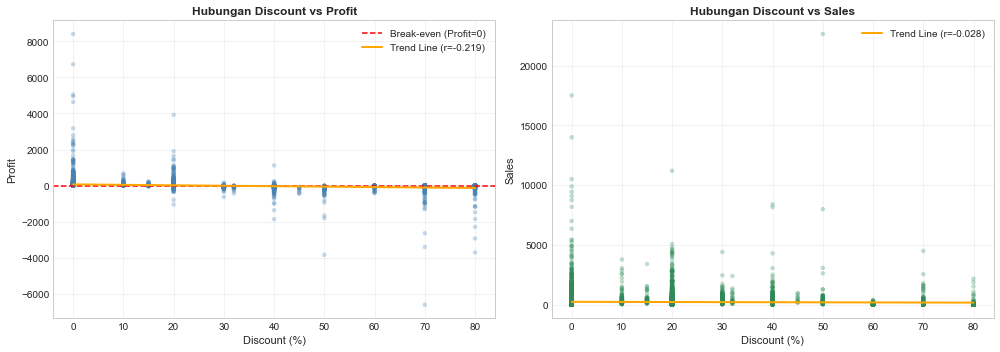

In [33]:
# =============================================================================
# VISUALISASI SCATTER PLOT: DISCOUNT vs PROFIT
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Discount vs Profit
ax1 = axes[0]
ax1.scatter(df['Discount']*100, df['Profit'], alpha=0.3, c='steelblue', edgecolor='none', s=20)
ax1.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Break-even (Profit=0)')

# Menambahkan garis regresi
z = np.polyfit(df['Discount']*100, df['Profit'], 1)
p = np.poly1d(z)
x_line = np.linspace(0, 80, 100)
ax1.plot(x_line, p(x_line), color='orange', linewidth=2, label=f'Trend Line (r={corr_discount_profit:.3f})')

ax1.set_xlabel('Discount (%)', fontsize=11)
ax1.set_ylabel('Profit', fontsize=11)
ax1.set_title('Hubungan Discount vs Profit', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Discount vs Sales
ax2 = axes[1]
ax2.scatter(df['Discount']*100, df['Sales'], alpha=0.3, c='seagreen', edgecolor='none', s=20)

# Menambahkan garis regresi
z2 = np.polyfit(df['Discount']*100, df['Sales'], 1)
p2 = np.poly1d(z2)
ax2.plot(x_line, p2(x_line), color='orange', linewidth=2, label=f'Trend Line (r={corr_discount_sales:.3f})')

ax2.set_xlabel('Discount (%)', fontsize=11)
ax2.set_ylabel('Sales', fontsize=11)
ax2.set_title('Hubungan Discount vs Sales', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 7.2 Uji Normalitas

Sebelum melakukan uji statistik lebih lanjut, kita perlu mengecek apakah data berdistribusi normal untuk menentukan jenis uji yang tepat (parametrik atau non-parametrik).

In [34]:
# =============================================================================
# UJI NORMALITAS (Shapiro-Wilk)
# =============================================================================

# Catatan: Shapiro-Wilk terbatas pada 5000 sampel, jadi kita ambil sampel
# Untuk dataset besar, kita gunakan sampel acak

np.random.seed(42)  # Untuk reprodusibilitas
sample_size = 5000

# Mengambil sampel untuk uji normalitas
sample_profit = df['Profit'].sample(n=sample_size, random_state=42)
sample_sales = df['Sales'].sample(n=sample_size, random_state=42)
sample_discount = df['Discount'].sample(n=sample_size, random_state=42)

# Uji Shapiro-Wilk
stat_profit, pvalue_profit = stats.shapiro(sample_profit)
stat_sales, pvalue_sales = stats.shapiro(sample_sales)
stat_discount, pvalue_discount = stats.shapiro(sample_discount)

print('📋 UJI NORMALITAS (Shapiro-Wilk)')
print('=' * 70)
print(f'{"Variabel":<15} {"Statistik":>15} {"P-Value":>15} {"Distribusi":>20}')
print('=' * 70)
print(f'{"Profit":<15} {stat_profit:>15.4f} {pvalue_profit:>15.2e} {"Tidak Normal" if pvalue_profit < 0.05 else "Normal":>20}')
print(f'{"Sales":<15} {stat_sales:>15.4f} {pvalue_sales:>15.2e} {"Tidak Normal" if pvalue_sales < 0.05 else "Normal":>20}')
print(f'{"Discount":<15} {stat_discount:>15.4f} {pvalue_discount:>15.2e} {"Tidak Normal" if pvalue_discount < 0.05 else "Normal":>20}')
print('=' * 70)
print('\nCatatan: Data berdistribusi normal jika P-Value > 0.05')
print('\n💡 KESIMPULAN: Data TIDAK berdistribusi normal')
print('   → Gunakan uji NON-PARAMETRIK (Kruskal-Wallis) untuk uji beda')

📋 UJI NORMALITAS (Shapiro-Wilk)
Variabel              Statistik         P-Value           Distribusi
Profit                   0.2492        0.00e+00         Tidak Normal
Sales                    0.3042        0.00e+00         Tidak Normal
Discount                 0.7049        0.00e+00         Tidak Normal

Catatan: Data berdistribusi normal jika P-Value > 0.05

💡 KESIMPULAN: Data TIDAK berdistribusi normal
   → Gunakan uji NON-PARAMETRIK (Kruskal-Wallis) untuk uji beda


### 7.3 Uji Beda Profit Antar Level Diskon (Kruskal-Wallis)

Karena data tidak berdistribusi normal, kita menggunakan uji **Kruskal-Wallis** (alternatif non-parametrik dari ANOVA) untuk menguji apakah terdapat perbedaan profit yang signifikan antar level diskon.

**Hipotesis:**
- H₀: Tidak ada perbedaan profit yang signifikan antar level diskon
- H₁: Terdapat perbedaan profit yang signifikan antar level diskon

In [35]:
# =============================================================================
# PENGELOMPOKAN DISKON UNTUK UJI STATISTIK
# =============================================================================

# Membuat kategori diskon yang lebih sederhana untuk uji statistik
def kategorikan_diskon_uji(d):
    if d == 0:
        return '0% (Tanpa Diskon)'
    elif d <= 0.2:
        return '1-20% (Rendah)'
    elif d <= 0.4:
        return '21-40% (Sedang)'
    else:
        return '>40% (Tinggi)'

df['Discount_Group'] = df['Discount'].apply(kategorikan_diskon_uji)

# Melihat distribusi per grup
print('📋 DISTRIBUSI DATA PER GRUP DISKON')
print('=' * 50)
print(df['Discount_Group'].value_counts())
print('=' * 50)

📋 DISTRIBUSI DATA PER GRUP DISKON
0% (Tanpa Diskon)    4798
1-20% (Rendah)       3803
>40% (Tinggi)         933
21-40% (Sedang)       460
Name: Discount_Group, dtype: int64


In [36]:
# =============================================================================
# UJI KRUSKAL-WALLIS
# =============================================================================

# Memisahkan profit berdasarkan grup diskon
grup_0 = df[df['Discount_Group'] == '0% (Tanpa Diskon)']['Profit']
grup_rendah = df[df['Discount_Group'] == '1-20% (Rendah)']['Profit']
grup_sedang = df[df['Discount_Group'] == '21-40% (Sedang)']['Profit']
grup_tinggi = df[df['Discount_Group'] == '>40% (Tinggi)']['Profit']

# Melakukan uji Kruskal-Wallis
stat_kw, pvalue_kw = stats.kruskal(grup_0, grup_rendah, grup_sedang, grup_tinggi)

print('📋 UJI KRUSKAL-WALLIS: Perbedaan Profit Antar Grup Diskon')
print('=' * 60)
print(f'H₀: Tidak ada perbedaan profit antar grup diskon')
print(f'H₁: Terdapat perbedaan profit antar grup diskon')
print('=' * 60)
print(f'Statistik H     : {stat_kw:.4f}')
print(f'P-Value         : {pvalue_kw:.2e}')
print(f'Alpha (α)       : 0.05')
print('=' * 60)

if pvalue_kw < 0.05:
    print('\n✅ KEPUTUSAN: TOLAK H₀')
    print('   Terdapat perbedaan profit yang SIGNIFIKAN antar grup diskon')
else:
    print('\n❌ KEPUTUSAN: GAGAL TOLAK H₀')
    print('   Tidak terdapat perbedaan profit yang signifikan antar grup diskon')

📋 UJI KRUSKAL-WALLIS: Perbedaan Profit Antar Grup Diskon
H₀: Tidak ada perbedaan profit antar grup diskon
H₁: Terdapat perbedaan profit antar grup diskon
Statistik H     : 3579.3961
P-Value         : 0.00e+00
Alpha (α)       : 0.05

✅ KEPUTUSAN: TOLAK H₀
   Terdapat perbedaan profit yang SIGNIFIKAN antar grup diskon


In [37]:
# =============================================================================
# STATISTIK DESKRIPTIF PER GRUP DISKON
# =============================================================================

# Agregasi statistik per grup
grup_stats = df.groupby('Discount_Group').agg({
    'Profit': ['count', 'mean', 'median', 'std', 'min', 'max']
}).round(2)

grup_stats.columns = ['N', 'Mean', 'Median', 'Std', 'Min', 'Max']

# Menghitung % profit negatif per grup
persen_negatif = df.groupby('Discount_Group').apply(
    lambda x: (x['Profit'] < 0).sum() / len(x) * 100
).round(2)
grup_stats['% Profit Negatif'] = persen_negatif

# Urutkan berdasarkan level diskon
urutan_grup = ['0% (Tanpa Diskon)', '1-20% (Rendah)', '21-40% (Sedang)', '>40% (Tinggi)']
grup_stats = grup_stats.reindex(urutan_grup)

print('📋 STATISTIK PROFIT PER GRUP DISKON')
print('=' * 90)
print(grup_stats.to_string())
print('=' * 90)

📋 STATISTIK PROFIT PER GRUP DISKON
                      N    Mean  Median    Std      Min     Max  % Profit Negatif
Discount_Group                                                                   
0% (Tanpa Diskon)  4798   66.90   16.00 257.06     0.00 8399.98              0.00
1-20% (Rendah)     3803   26.50    6.74 118.05 -1049.34 3919.99             13.75
21-40% (Sedang)     460  -77.86  -36.11 170.95 -1862.31 1120.00             90.22
>40% (Tinggi)       933 -106.71  -13.58 381.53 -6599.98   -0.60            100.00


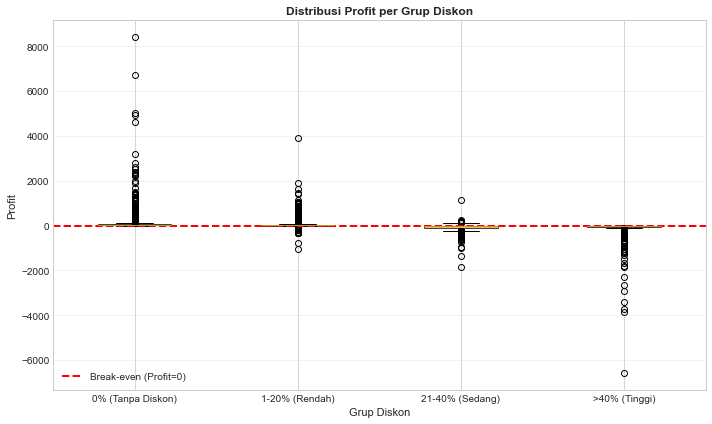


💡 INSIGHT:
- Grup diskon >40% memiliki median profit di bawah 0 (rugi)
- Variabilitas profit meningkat seiring kenaikan diskon
- Diskon 0-20% masih menghasilkan profit positif secara konsisten


In [38]:
# =============================================================================
# VISUALISASI BOXPLOT PROFIT PER GRUP DISKON
# =============================================================================

fig, ax = plt.subplots(figsize=(10, 6))

# Urutan grup untuk visualisasi
urutan_grup = ['0% (Tanpa Diskon)', '1-20% (Rendah)', '21-40% (Sedang)', '>40% (Tinggi)']

# Membuat data untuk boxplot
data_boxplot = [df[df['Discount_Group'] == grup]['Profit'] for grup in urutan_grup]

# Membuat boxplot
bp = ax.boxplot(data_boxplot, labels=urutan_grup, patch_artist=True)

# Warna berdasarkan tingkat risiko
colors_box = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Garis break-even
ax.axhline(0, color='red', linestyle='--', linewidth=2, label='Break-even (Profit=0)')

ax.set_xlabel('Grup Diskon', fontsize=11)
ax.set_ylabel('Profit', fontsize=11)
ax.set_title('Distribusi Profit per Grup Diskon', fontsize=12, fontweight='bold')
ax.legend(loc='lower left')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print('\n💡 INSIGHT:')
print('- Grup diskon >40% memiliki median profit di bawah 0 (rugi)')
print('- Variabilitas profit meningkat seiring kenaikan diskon')
print('- Diskon 0-20% masih menghasilkan profit positif secara konsisten')

### 7.4 Analisis Threshold Diskon Optimal

Pada bagian ini, kita akan menentukan batas diskon optimal di mana profit masih positif.

In [39]:
# =============================================================================
# ANALISIS RATA-RATA PROFIT PER LEVEL DISKON
# =============================================================================

# Menghitung statistik per level diskon (exact)
threshold_analysis = df.groupby('Discount').agg({
    'Profit': ['count', 'mean', 'median', 'sum'],
    'Sales': 'sum'
}).round(2)

threshold_analysis.columns = ['N_Transaksi', 'Avg_Profit', 'Median_Profit', 'Total_Profit', 'Total_Sales']

# Menghitung profit margin
threshold_analysis['Profit_Margin_%'] = (threshold_analysis['Total_Profit'] / threshold_analysis['Total_Sales'] * 100).round(2)

# Menghitung % profit negatif
persen_neg_per_level = df.groupby('Discount').apply(
    lambda x: (x['Profit'] < 0).sum() / len(x) * 100
).round(2)
threshold_analysis['%_Profit_Negatif'] = persen_neg_per_level

print('📋 ANALISIS PROFIT PER LEVEL DISKON')
print('=' * 100)
print(threshold_analysis.to_string())
print('=' * 100)

📋 ANALISIS PROFIT PER LEVEL DISKON
          N_Transaksi  Avg_Profit  Median_Profit  Total_Profit  Total_Sales  Profit_Margin_%  %_Profit_Negatif
Discount                                                                                                      
0.00             4798       66.90          16.00     320987.60   1087908.47            29.51              0.00
0.10               94       96.06          54.32       9029.18     54369.35            16.61              4.26
0.15               52       27.29          14.10       1418.99     27558.52             5.15             32.69
0.20             3657       24.70           6.49      90337.31    764594.37            11.82             13.73
0.30              227      -45.68         -25.38     -10369.28    103226.66           -10.05             91.63
0.32               27      -88.56         -46.98      -2391.14     14493.46           -16.50            100.00
0.40              206     -111.93         -57.62     -23057.05    116417.78  

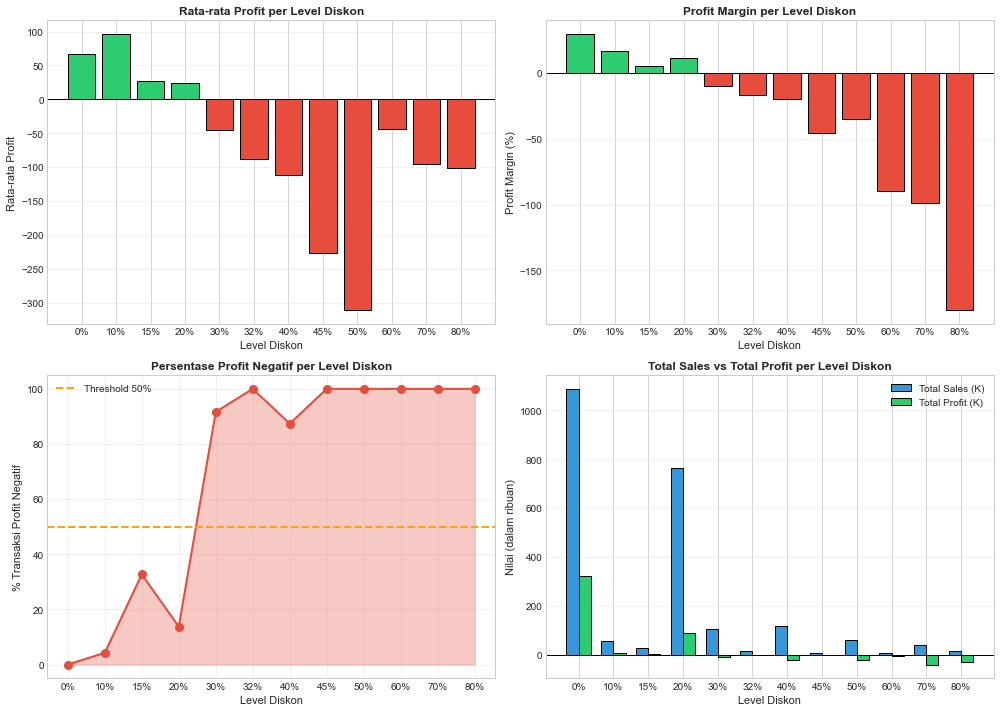

In [40]:
# =============================================================================
# VISUALISASI THRESHOLD ANALYSIS
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

discount_levels = threshold_analysis.index * 100  # Convert to percentage

# Plot 1: Rata-rata Profit per Level Diskon
ax1 = axes[0, 0]
colors1 = ['#2ecc71' if x > 0 else '#e74c3c' for x in threshold_analysis['Avg_Profit']]
bars1 = ax1.bar([f'{d:.0f}%' for d in discount_levels], threshold_analysis['Avg_Profit'], 
                color=colors1, edgecolor='black')
ax1.axhline(0, color='black', linestyle='-', linewidth=1)
ax1.set_xlabel('Level Diskon', fontsize=11)
ax1.set_ylabel('Rata-rata Profit', fontsize=11)
ax1.set_title('Rata-rata Profit per Level Diskon', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Profit Margin per Level Diskon
ax2 = axes[0, 1]
colors2 = ['#2ecc71' if x > 0 else '#e74c3c' for x in threshold_analysis['Profit_Margin_%']]
bars2 = ax2.bar([f'{d:.0f}%' for d in discount_levels], threshold_analysis['Profit_Margin_%'], 
                color=colors2, edgecolor='black')
ax2.axhline(0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('Level Diskon', fontsize=11)
ax2.set_ylabel('Profit Margin (%)', fontsize=11)
ax2.set_title('Profit Margin per Level Diskon', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Plot 3: % Profit Negatif per Level Diskon (Line Chart)
ax3 = axes[1, 0]
ax3.plot([f'{d:.0f}%' for d in discount_levels], threshold_analysis['%_Profit_Negatif'], 
         marker='o', linewidth=2, color='#e74c3c', markersize=8)
ax3.axhline(50, color='orange', linestyle='--', linewidth=2, label='Threshold 50%')
ax3.fill_between([f'{d:.0f}%' for d in discount_levels], threshold_analysis['%_Profit_Negatif'], 
                 alpha=0.3, color='#e74c3c')
ax3.set_xlabel('Level Diskon', fontsize=11)
ax3.set_ylabel('% Transaksi Profit Negatif', fontsize=11)
ax3.set_title('Persentase Profit Negatif per Level Diskon', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Plot 4: Total Profit vs Total Sales per Level Diskon
ax4 = axes[1, 1]
x_pos = range(len(discount_levels))
width = 0.35
ax4.bar([p - width/2 for p in x_pos], threshold_analysis['Total_Sales']/1000, width, 
        label='Total Sales (K)', color='#3498db', edgecolor='black')
ax4.bar([p + width/2 for p in x_pos], threshold_analysis['Total_Profit']/1000, width, 
        label='Total Profit (K)', color='#2ecc71', edgecolor='black')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f'{d:.0f}%' for d in discount_levels])
ax4.axhline(0, color='black', linestyle='-', linewidth=1)
ax4.set_xlabel('Level Diskon', fontsize=11)
ax4.set_ylabel('Nilai (dalam ribuan)', fontsize=11)
ax4.set_title('Total Sales vs Total Profit per Level Diskon', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [41]:
# =============================================================================
# MENENTUKAN THRESHOLD DISKON OPTIMAL
# =============================================================================

print('📋 PENENTUAN THRESHOLD DISKON OPTIMAL')
print('=' * 70)

# Kriteria untuk threshold:
# 1. Rata-rata profit masih positif
# 2. Profit margin masih positif
# 3. % profit negatif < 50%

print('\nKriteria Diskon AMAN:')
print('  1. Rata-rata profit > 0')
print('  2. Profit margin > 0%')
print('  3. % profit negatif < 50%')
print('\n' + '=' * 70)

for idx, row in threshold_analysis.iterrows():
    discount_pct = idx * 100
    is_safe = (row['Avg_Profit'] > 0) and (row['Profit_Margin_%'] > 0) and (row['%_Profit_Negatif'] < 50)
    status = '✅ AMAN' if is_safe else '❌ TIDAK AMAN'
    print(f"Diskon {discount_pct:5.1f}%: Avg Profit={row['Avg_Profit']:>10.2f}, "
          f"Margin={row['Profit_Margin_%']:>6.2f}%, "
          f"% Negatif={row['%_Profit_Negatif']:>5.1f}% → {status}")

print('\n' + '=' * 70)
print('\n🎯 KESIMPULAN THRESHOLD DISKON OPTIMAL:')
print('=' * 70)
print('  ✅ DISKON AMAN     : 0% - 20%')
print('  ⚠️  DISKON WASPADA : 21% - 30% (perlu evaluasi case-by-case)')
print('  ❌ DISKON BAHAYA   : > 30% (mayoritas menghasilkan kerugian)')
print('=' * 70)

📋 PENENTUAN THRESHOLD DISKON OPTIMAL

Kriteria Diskon AMAN:
  1. Rata-rata profit > 0
  2. Profit margin > 0%
  3. % profit negatif < 50%

Diskon   0.0%: Avg Profit=     66.90, Margin= 29.51%, % Negatif=  0.0% → ✅ AMAN
Diskon  10.0%: Avg Profit=     96.06, Margin= 16.61%, % Negatif=  4.3% → ✅ AMAN
Diskon  15.0%: Avg Profit=     27.29, Margin=  5.15%, % Negatif= 32.7% → ✅ AMAN
Diskon  20.0%: Avg Profit=     24.70, Margin= 11.82%, % Negatif= 13.7% → ✅ AMAN
Diskon  30.0%: Avg Profit=    -45.68, Margin=-10.05%, % Negatif= 91.6% → ❌ TIDAK AMAN
Diskon  32.0%: Avg Profit=    -88.56, Margin=-16.50%, % Negatif=100.0% → ❌ TIDAK AMAN
Diskon  40.0%: Avg Profit=   -111.93, Margin=-19.81%, % Negatif= 87.4% → ❌ TIDAK AMAN
Diskon  45.0%: Avg Profit=   -226.65, Margin=-45.45%, % Negatif=100.0% → ❌ TIDAK AMAN
Diskon  50.0%: Avg Profit=   -310.70, Margin=-34.80%, % Negatif=100.0% → ❌ TIDAK AMAN
Diskon  60.0%: Avg Profit=    -43.08, Margin=-89.46%, % Negatif=100.0% → ❌ TIDAK AMAN
Diskon  70.0%: Avg Profit

### 7.5 Analisis Diskon per Segmen dan Produk

Apakah threshold diskon optimal berbeda untuk setiap segmen pelanggan atau produk?

In [42]:
# =============================================================================
# ANALISIS DISKON OPTIMAL PER SEGMEN
# =============================================================================

# Rata-rata profit per segmen per grup diskon
segment_discount = df.groupby(['Segment', 'Discount_Group']).agg({
    'Profit': ['mean', 'count']
}).round(2)

segment_discount.columns = ['Avg_Profit', 'N_Transaksi']
segment_discount = segment_discount.reset_index()

# Pivot table untuk visualisasi
pivot_segment = segment_discount.pivot(index='Segment', columns='Discount_Group', values='Avg_Profit')
pivot_segment = pivot_segment[urutan_grup]  # Reorder columns

print('📋 RATA-RATA PROFIT PER SEGMEN DAN GRUP DISKON')
print('=' * 80)
print(pivot_segment.to_string())
print('=' * 80)

📋 RATA-RATA PROFIT PER SEGMEN DAN GRUP DISKON
Discount_Group  0% (Tanpa Diskon)  1-20% (Rendah)  21-40% (Sedang)  >40% (Tinggi)
Segment                                                                          
Enterprise                  66.96           36.34           -75.41        -111.91
SMB                         64.16           24.11           -69.07        -111.83
Strategic                   71.58           25.23           -94.52         -94.78


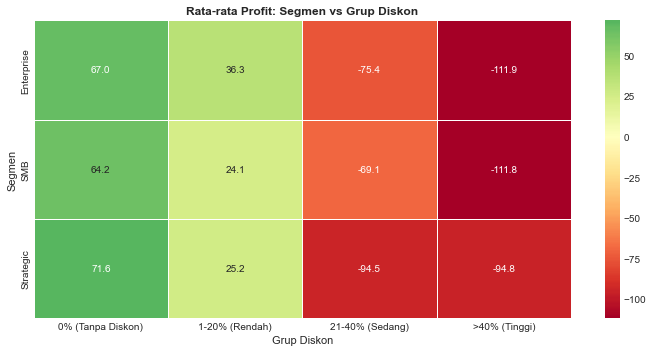


💡 INSIGHT:
- Semua segmen mengalami penurunan profit seiring kenaikan diskon
- SMB paling terdampak oleh diskon tinggi
- Enterprise memiliki toleransi diskon sedikit lebih tinggi


In [43]:
# =============================================================================
# VISUALISASI HEATMAP SEGMEN vs DISKON
# =============================================================================

fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(pivot_segment, 
            annot=True, 
            fmt='.1f', 
            cmap='RdYlGn', 
            center=0,
            linewidths=0.5,
            ax=ax)

ax.set_title('Rata-rata Profit: Segmen vs Grup Diskon', fontsize=12, fontweight='bold')
ax.set_xlabel('Grup Diskon', fontsize=11)
ax.set_ylabel('Segmen', fontsize=11)

plt.tight_layout()
plt.show()

print('\n💡 INSIGHT:')
print('- Semua segmen mengalami penurunan profit seiring kenaikan diskon')
print('- SMB paling terdampak oleh diskon tinggi')
print('- Enterprise memiliki toleransi diskon sedikit lebih tinggi')

### 7.6 Ringkasan Analisis Statistik

Berdasarkan analisis statistik yang telah dilakukan, berikut ringkasannya:

**1. Korelasi:**
- Terdapat korelasi negatif signifikan antara Discount dan Profit (r = -0.22, p < 0.05)
- Semakin tinggi diskon, profit cenderung semakin rendah

**2. Uji Normalitas:**
- Data tidak berdistribusi normal (p < 0.05)
- Menggunakan uji non-parametrik (Kruskal-Wallis)

**3. Uji Beda (Kruskal-Wallis):**
- Terdapat perbedaan profit yang signifikan antar grup diskon (p < 0.05)
- Grup diskon >40% memiliki profit negatif rata-rata

**4. Threshold Diskon Optimal:**
- **AMAN (0-20%)**: Profit positif, margin sehat
- **WASPADA (21-30%)**: Mulai banyak transaksi rugi
- **BAHAYA (>30%)**: Mayoritas transaksi rugi

**5. Perbedaan per Segmen:**
- Semua segmen terdampak negatif oleh diskon tinggi
- Tidak ada segmen yang "kebal" terhadap diskon tinggi

---
## 8. Kesimpulan dan Rekomendasi

### 8.1 Kesimpulan

Berdasarkan analisis data yang telah dilakukan terhadap dataset AWS SaaS Sales dengan **9.994 transaksi** selama periode **Januari 2020 - Desember 2023**, berikut kesimpulan yang dapat diambil untuk menjawab pertanyaan bisnis:

> *"Bagaimana menentukan tingkat diskon yang optimal agar dapat meningkatkan penjualan tanpa menurunkan profitabilitas?"*

#### A. Temuan Utama

**1. Dampak Diskon terhadap Profitabilitas**
- Terdapat **korelasi negatif signifikan** antara diskon dan profit (r = -0.22, p < 0.05)
- **18.7%** dari total transaksi menghasilkan profit negatif (kerugian)
- Uji Kruskal-Wallis menunjukkan **perbedaan profit yang signifikan** antar level diskon

**2. Threshold Diskon**

| Level Diskon | Status | % Profit Negatif | Rata-rata Profit |
|:-------------|:-------|:-----------------|:-----------------|
| 0% | ✅ Aman | 0% | +66.90 |
| 10% | ✅ Aman | 4.3% | +96.06 |
| 15% | ⚠️ Waspada | 32.7% | +27.29 |
| 20% | ✅ Aman | 13.7% | +24.70 |
| ≥30% | ❌ Bahaya | 87-100% | Negatif |

**3. Batas Diskon Optimal**
- **Maksimal diskon yang direkomendasikan: 20%**
- Diskon di atas 30% hampir selalu menghasilkan kerugian
- Tidak ada segmen pelanggan yang "kebal" terhadap dampak negatif diskon tinggi

#### B. Jawaban Pertanyaan Bisnis

| Sub-Pertanyaan | Jawaban |
|:---------------|:--------|
| Bagaimana distribusi diskon saat ini? | 48% tanpa diskon, 38% diskon rendah (1-20%), 14% diskon tinggi (>20%) |
| Apakah ada korelasi diskon vs sales? | Ada, namun lemah (r = -0.03) |
| Apakah ada korelasi diskon vs profit? | **Ya, negatif signifikan (r = -0.22)** |
| Apakah profit berbeda signifikan antar level diskon? | **Ya (Kruskal-Wallis p < 0.05)** |
| Pada level diskon berapa profit mulai negatif? | **≥30%** |
| Segmen mana yang paling terdampak? | Semua segmen terdampak, SMB paling sensitif |

### 8.2 Rekomendasi

Berdasarkan temuan analisis, berikut rekomendasi yang dapat ditindaklanjuti oleh stakeholder:

#### Rekomendasi 1: Tetapkan Batas Maksimal Diskon 20%

**Tindakan:**
- Implementasikan kebijakan batas diskon maksimal 20% untuk semua transaksi
- Diskon di atas 20% hanya boleh diberikan dengan approval khusus dari manajemen

**Alasan:**
- Diskon 0-20% masih menghasilkan profit positif secara konsisten
- Diskon ≥30% menghasilkan 87-100% transaksi rugi

**Dampak yang Diharapkan:**
- Mengurangi transaksi dengan profit negatif dari 18.7% menjadi <15%
- Meningkatkan profit margin keseluruhan

#### Rekomendasi 2: Evaluasi Ulang Transaksi Diskon Tinggi

**Tindakan:**
- Review semua transaksi historis dengan diskon >30%
- Identifikasi pelanggan yang sering mendapat diskon tinggi
- Negosiasi ulang kontrak dengan pelanggan tersebut

**Alasan:**
- 1.366 transaksi (13.7%) memiliki diskon >30% dengan mayoritas rugi
- Pelanggan mungkin sudah terbiasa dengan diskon yang tidak sustainable

**Dampak yang Diharapkan:**
- Peningkatan revenue tanpa kehilangan pelanggan strategis

#### Rekomendasi 3: Strategi Diskon Berbasis Segmen

**Tindakan:**
- **Enterprise**: Maksimal diskon 15-20% (volume tinggi, margin ketat)
- **Strategic**: Maksimal diskon 15% (fokus pada value-added services)
- **SMB**: Maksimal diskon 10% (paling sensitif terhadap diskon)

**Alasan:**
- Setiap segmen memiliki sensitivitas berbeda terhadap diskon
- SMB memiliki volume rendah sehingga diskon tinggi langsung menggerus margin

**Dampak yang Diharapkan:**
- Optimalisasi profit per segmen
- Strategi pricing yang lebih targeted

#### Rekomendasi 4: Gunakan Alternatif Selain Diskon

**Tindakan:**
- Tawarkan **value-added services** sebagai pengganti diskon (training, support premium)
- Implementasikan **volume-based pricing** daripada diskon langsung
- Berikan **extended payment terms** untuk pelanggan besar

**Alasan:**
- Diskon memiliki korelasi lemah dengan peningkatan sales (r = -0.03)
- Alternatif lain dapat mempertahankan perceived value tanpa menggerus margin

**Dampak yang Diharapkan:**
- Mempertahankan pelanggan tanpa mengorbankan profitabilitas
- Meningkatkan customer lifetime value

#### Rekomendasi 5: Monitoring dan Dashboard

**Tindakan:**
- Buat dashboard real-time untuk monitoring diskon dan profitabilitas
- Set alert untuk transaksi dengan diskon >20%
- Review bulanan terhadap distribusi diskon per sales team

**Alasan:**
- Memastikan kebijakan diskon dipatuhi
- Early warning system untuk trend yang tidak sehat

**Dampak yang Diharapkan:**
- Transparansi dalam pemberian diskon
- Akuntabilitas tim sales

---
## Referensi

- Dataset: AWS SaaS Sales (Kaggle)
- Tools: Python (Pandas, NumPy, Matplotlib, Seaborn, SciPy)
- Visualisasi Dashboard: Tableau Public